In [ ]:
import pandas as pd

uploading the csv from drive

In [ ]:
path='/content/players_data_batters_full.csv'
data=pd.read_csv(path)

print(data.head())

       Player Bat1 Bat2 Runs   BF     SR  4s 6s  Unnamed: 8         Ground  \
0  AK Markram   97   15  112  178  62.92  15  0         NaN  Potchefstroom   
1  AK Markram  143    -  143  186  76.88  22  0         NaN   Bloemfontein   
2  AK Markram   66    -   66   60    110   4  2         NaN    East London   
3  AK Markram  125    -  125  204  61.27  14  2         NaN       Gqeberha   
4  AK Markram    5   34   39   54  72.22   8  0         NaN      Cape Town   

  Start Date  temp  humidity  windspeed        conditions format  opposition  
0  28-Sep-17  65.9      47.9       16.6             Clear   Test  Bangladesh  
1   6-Oct-17  59.9      56.3       11.4             Clear   Test  Bangladesh  
2  22-Oct-17  69.5      76.7       15.9             Clear    ODI  Bangladesh  
3  26-Dec-17  65.9      65.3       16.1  Partially cloudy   Test    Zimbabwe  
4   5-Jan-18  70.3      70.5       27.7  Partially cloudy   Test       India  


In [ ]:
def remove_col(data):
  del data['Start Date']
  del data['Unnamed: 8']
  return data

data=remove_col(data)


In [ ]:
def weather(data):
  data['temp'].fillna('60', inplace=True)
  data['humidity'].fillna('65', inplace=True)
  data['windspeed'].fillna('5', inplace=True)
  data['conditions'].fillna('Partially cloudy', inplace=True)
  return data

data=weather(data)

In [ ]:
def change(data):
    for i in range(len(data['Runs'])):
      data['Runs'][i]=data['Runs'][i].strip()
      data['BF'][i]=data['BF'][i].strip()
      data['4s'][i]=data['4s'][i].strip()
      data['6s'][i]=data['6s'][i].strip()
      if data['Runs'][i]== '-':
        data['Runs'][i]='0'
      if data['BF'][i]=='-':
        data['BF'][i]='0'
      if data['4s'][i]=='-':
        data['4s'][i]='0'
      if data['6s'][i]=='-':
        data['6s'][i]='0'


    return data

data=change(data)


<ipython-input-12-c4e20358d2e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Runs'][i]=data['Runs'][i].strip()
<ipython-input-12-c4e20358d2e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BF'][i]=data['BF'][i].strip()
<ipython-input-12-c4e20358d2e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['4s'][i]=data['4s'][i].strip()
<ipython-input-12-c4e20358d2e1>:6: SettingWithCopyWarning: 
A value is trying to be 

converting player , ground , conditions, opposition,format into index value

In [ ]:
import numpy as np
import pickle

In [ ]:
def to_float(data):
  for i in range(len(data)):
    data['Runs'][i]=float(data['Runs'][i])
    data['4s'][i]=int(data['4s'][i])
    data['6s'][i]=int(data['6s'][i])
    data['temp'][i]=float(data['temp'][i])
    data['humidity'][i]=float(data['humidity'][i])
    data['windspeed'][i]=float(data['windspeed'][i])

  return data

data=to_float(data)

<ipython-input-13-9f0c86ab4999>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Runs'][i]=float(data['Runs'][i])
<ipython-input-13-9f0c86ab4999>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['4s'][i]=int(data['4s'][i])
<ipython-input-13-9f0c86ab4999>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['6s'][i]=int(data['6s'][i])


In [ ]:
print(data['4s'].max())

39


In [ ]:
print(data['6s'].max())

16


In [ ]:
def convert_player(one_data):
  indices=[]
  for i in range(len(one_data)):
    if one_data['Player'][i] not in indices:
      indices.append(one_data['Player'][i])

  for i in range(len(one_data)):
    one_data['Player'][i]=np.uint8(indices.index(one_data['Player'][i]))

  with open('/content/drive/MyDrive/files/player.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_data


def convert_ground(one_hot_encoded):
  indices=[]
  for i in range(len(one_hot_encoded)):
    if one_hot_encoded['Ground'][i] not in indices:
      indices.append(one_hot_encoded['Ground'][i])

  for i in range(len(one_hot_encoded)):
    one_hot_encoded['Ground'][i]=np.uint8(indices.index(one_hot_encoded['Ground'][i]))

  with open('/content/drive/MyDrive/files/ground.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_hot_encoded


def convert_conditions(one_hot_encoded):
  indices=[]
  for i in range(len(one_hot_encoded)):
    if one_hot_encoded['conditions'][i] not in indices:
      indices.append(one_hot_encoded['conditions'][i])

  for i in range(len(one_hot_encoded)):
    one_hot_encoded['conditions'][i]=np.uint8(indices.index(one_hot_encoded['conditions'][i]))

  with open('/content/drive/MyDrive/files/conditions.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_hot_encoded

def convert_opposition(one_hot_encoded):
  indices=[]
  for i in range(len(one_hot_encoded)):
    if one_hot_encoded['opposition'][i] not in indices:
      indices.append(one_hot_encoded['opposition'][i])

  for i in range(len(one_hot_encoded)):
    one_hot_encoded['opposition'][i]=np.uint8(indices.index(one_hot_encoded['opposition'][i]))

  with open('/content/drive/MyDrive/files/opposition.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_hot_encoded


def convert_format(one_hot_encoded):
  indices=[]
  for i in range(len(one_hot_encoded)):
    if one_hot_encoded['format'][i] not in indices:
      indices.append(one_hot_encoded['format'][i])

  for i in range(len(one_hot_encoded)):
    one_hot_encoded['format'][i]=np.uint8(indices.index(one_hot_encoded['format'][i]))

  with open('/content/drive/MyDrive/files/format.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_hot_encoded

def convert_temp(one_hot_encoded):
  indices=[]
  for i in range(len(one_hot_encoded)):
    if one_hot_encoded['temp'][i] not in indices:
      indices.append(one_hot_encoded['temp'][i])

  for i in range(len(one_hot_encoded)):
    one_hot_encoded['temp'][i]=np.uint8(indices.index(one_hot_encoded['temp'][i]))

  with open('/content/drive/MyDrive/files/temp.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_hot_encoded

def convert_windspeed(one_hot_encoded):
  indices=[]
  for i in range(len(one_hot_encoded)):
    if one_hot_encoded['windspeed'][i] not in indices:
      indices.append(one_hot_encoded['windspeed'][i])

  for i in range(len(one_hot_encoded)):
    one_hot_encoded['windspeed'][i]=np.uint8(indices.index(one_hot_encoded['windspeed'][i]))

  with open('/content/drive/MyDrive/files/windspeed.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_hot_encoded

def convert_humidity(one_hot_encoded):
  indices=[]
  for i in range(len(one_hot_encoded)):
    if one_hot_encoded['humidity'][i] not in indices:
      indices.append(one_hot_encoded['humidity'][i])

  for i in range(len(one_hot_encoded)):
    one_hot_encoded['humidity'][i]=np.uint8(indices.index(one_hot_encoded['humidity'][i]))

  with open('/content/drive/MyDrive/files/humidity.pkl', 'wb') as f:
    pickle.dump(indices, f)

  return one_hot_encoded

data=convert_player(data)
data=convert_ground(data)
data=convert_conditions(data)
data=convert_opposition(data)
data=convert_format(data)
data=convert_temp(data)
data=convert_windspeed(data)
data=convert_humidity(data)




<ipython-input-16-36fcb3651559>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_data['Player'][i]=np.uint8(indices.index(one_data['Player'][i]))
<ipython-input-16-36fcb3651559>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_encoded['Ground'][i]=np.uint8(indices.index(one_hot_encoded['Ground'][i]))
<ipython-input-16-36fcb3651559>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_encoded['conditions'][i]=np.uint8(

Runs:

0-30,30-60 ,60-100 ,100-150,150-200,200+

0 , 1 , 2 , 3 , 4 , 5

In [ ]:
import math
def change_runs(one_hot_encoded):
  for i in range(len(one_hot_encoded['Runs'])):
    int_runs=round(one_hot_encoded['Runs'][i])
    if int_runs<30:
      one_hot_encoded['Runs'][i]=0
    elif int_runs>=30 and int_runs<60:
      one_hot_encoded['Runs'][i]=1
    elif int_runs>=60 and int_runs<100:
      one_hot_encoded['Runs'][i]=2
    elif int_runs>=100 and int_runs<150:
      one_hot_encoded['Runs'][i]=3
    elif int_runs>=150 and int_runs<200:
      one_hot_encoded['Runs'][i]=4
    else:
      one_hot_encoded['Runs'][i]=5

    # one_hot_encoded['Runs'][i]=np.uint8(classes.index((int(one_hot_encoded['Runs'][i])//20)*20))

  return one_hot_encoded

# 0-5 , 5-10 , 10-20 , 20+
def change_4(one_hot_encoded):
  for i in range(len(one_hot_encoded)):
    int_runs=one_hot_encoded['4s'][i]
    if int_runs<5:
      int_runs=0
    elif int_runs>=5 and int_runs<10:
      int_runs=1
    elif int_runs>=10 and int_runs<20:
      int_runs=2
    else:
      int_runs=3
    one_hot_encoded['4s'][i]=int_runs

#   return one_hot_encoded

#0-3 , 3-6 , 6-10 , 10+
def change_six(one_hot_encoded):
  for i in range(len(one_hot_encoded)):
    int_runs=one_hot_encoded['6s'][i]
    if int_runs<3:
      int_runs=0
    elif int_runs>=3 and int_runs<6:
      int_runs=1
    elif int_runs>=6 and int_runs<10:
      int_runs=2
    elif int_runs>=10:
      int_runs=3
    one_hot_encoded['6s'][i]=int_runs
  return one_hot_encoded

data=change_runs(data)
# data=change_six(data)

<ipython-input-17-25b267f4b0d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_encoded['Runs'][i]=3
<ipython-input-17-25b267f4b0d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_encoded['Runs'][i]=2
<ipython-input-17-25b267f4b0d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_encoded['Runs'][i]=1
<ipython-input-17-25b267f4b0d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

One hot encoding:

In [ ]:
category_column = 'Player'

# Apply one-hot encoding to the 'category_column'
data = pd.get_dummies(data, columns=[category_column])

<ipython-input-18-7869bf4bd8ca>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=[category_column])


In [ ]:
category_column = 'format'

# Apply one-hot encoding to the 'category_column'
data = pd.get_dummies(data, columns=[category_column])

<ipython-input-19-8616e39a1b18>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=[category_column])


In [ ]:
category_column = 'Ground'

# Apply one-hot encoding to the 'category_column'
data = pd.get_dummies(data, columns=[category_column])

<ipython-input-20-fc380523dc30>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=[category_column])


In [ ]:
category_column = 'conditions'

# Apply one-hot encoding to the 'category_column'
data = pd.get_dummies(data, columns=[category_column])

<ipython-input-21-aedda7eded23>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=[category_column])


In [ ]:
category_column = 'opposition'

# Apply one-hot encoding to the 'category_column'
data = pd.get_dummies(data, columns=[category_column])

<ipython-input-22-badcfc4a7fa5>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, columns=[category_column])


In [ ]:
print(data.columns)
print(len(data.columns))

Index(['Bat1', 'Bat2', 'Runs', 'BF', 'SR', '4s', '6s', 'temp', 'humidity',
       'windspeed',
       ...
       'opposition_Nepal', 'opposition_Netherlands', 'opposition_New Zealand',
       'opposition_Pakistan', 'opposition_Scotland', 'opposition_South Africa',
       'opposition_Sri Lanka', 'opposition_U.A.E.', 'opposition_West Indies',
       'opposition_Zimbabwe'],
      dtype='object', length=170)
170


In [ ]:
cols=[]
for i in data.columns:
  if 'Player' in i or 'opposition' in i or 'conditions' in i or 'Ground' in i or 'format' in i:
    str(cols.append(i))

print(len(cols))

160


In [ ]:
print(len(cols))

160


In [ ]:
y = data['Runs']
X = data[cols[::]]

In [ ]:
print(y.max())

5


In [ ]:
y = pd.get_dummies(y, columns=['Runs'])

<ipython-input-717-f84c48d743cf>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  y = pd.get_dummies(y, columns=['Runs'])


In [ ]:
print(y.columns)

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


----------------------------------------------------------------------------

---------------------------------------------------

splitting such that every player is there in both splits atleast once

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
import numpy as np
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)
X_val=X_val.astype(np.float32)
y_val=y_val.astype(np.float32)
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
import tensorflow as tf

In [ ]:
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train)
X_val=tf.convert_to_tensor(X_val)
y_val=tf.convert_to_tensor(y_val)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test)


## **using NN**

In [ ]:
print(X.columns)

Index(['Player_AK Markram', 'Player_BA Stokes', 'Player_DA Warner',
       'Player_GD Phillips', 'Player_GJ Maxwell', 'Player_H Klaasen',
       'Player_JC Buttler', 'Player_JM Bairstow', 'Player_KL Rahul',
       'Player_KS Williamson',
       ...
       'opposition_Nepal', 'opposition_Netherlands', 'opposition_New Zealand',
       'opposition_Pakistan', 'opposition_Scotland', 'opposition_South Africa',
       'opposition_Sri Lanka', 'opposition_U.A.E.', 'opposition_West Indies',
       'opposition_Zimbabwe'],
      dtype='object', length=160)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.optimizers import Adam
from keras.regularizers import l2
# from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model= keras.Sequential([
    keras.layers.Dense(64,activation="relu", kernel_regularizer=l2(0.2)),
    keras.layers.Dense(32,activation="relu", kernel_regularizer=l2(0.2)),
    keras.layers.Dense(16,activation="relu", kernel_regularizer=l2(0.2)),
    keras.layers.Dense(6,activation="softmax")
])

In [ ]:
optimizer=Adam(learning_rate=0.000001)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=85,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/85
34/34 [==============================] - 4s 19ms/step - loss: 32.7975 - accuracy: 0.0880 - val_loss: 32.7867 - val_accuracy: 0.0876
Epoch 2/85
34/34 [==============================] - 0s 9ms/step - loss: 32.7813 - accuracy: 0.0880 - val_loss: 32.7705 - val_accuracy: 0.0876
Epoch 3/85
34/34 [==============================] - 0s 4ms/step - loss: 32.7651 - accuracy: 0.0875 - val_loss: 32.7543 - val_accuracy: 0.0876
Epoch 4/85
34/34 [==============================] - 0s 5ms/step - loss: 32.7489 - accuracy: 0.0880 - val_loss: 32.7382 - val_accuracy: 0.0876
Epoch 5/85
34/34 [==============================] - 0s 5ms/step - loss: 32.7327 - accuracy: 0.0880 - val_loss: 32.7220 - val_accuracy: 0.0876
Epoch 6/85
34/34 [==============================] - 0s 4ms/step - loss: 32.7166 - accuracy: 0.0880 - val_loss: 32.7058 - val_accuracy: 0.0876
Epoch 7/85
34/34 [==============================] - 0s 4ms/step - loss: 32.7004 - accuracy: 0.0880 - val_loss: 32.6897 - val_accuracy: 0.0876
Epoch

In [ ]:
from sklearn.metrics import recall_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class indices
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall for each class
recall_per_class = recall_score(y_test_classes, y_pred_classes, average=None)

# Print recall for each class
for class_label, recall in enumerate(recall_per_class):
    print(f"Recall for Class {class_label}: {recall:.4f}")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/34 [==============================] - 0s 2ms/step
Recall for Class 0: 0.0000
Recall for Class 1: 0.1456
Recall for Class 2: 0.0180
Recall for Class 3: 0.7975
Recall for Class 4: 0.0000
Recall for Class 5: 0.0000


In [ ]:
model.save('/content/drive/MyDrive/files/model_batting_recall-11-32-2-37-0-6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel


ValueError: ignored

In [1]:
from keras.models import load_model

# Replace 'your_model.h5' with the path to your .h5 file
model = load_model('/content/drive/MyDrive/files/model_batting_recall-03-30-34-18-14-0.h5')

# Now you can use the 'model' object to make predictions or further training.


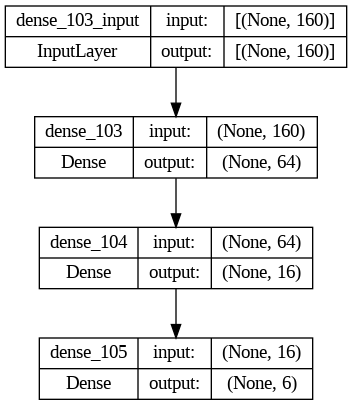

In [2]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(X.columns)

Index(['Player_AK Markram', 'Player_BA Stokes', 'Player_DA Warner',
       'Player_GD Phillips', 'Player_GJ Maxwell', 'Player_H Klaasen',
       'Player_JC Buttler', 'Player_JM Bairstow', 'Player_KL Rahul',
       'Player_KS Williamson',
       ...
       'opposition_Nepal', 'opposition_Netherlands', 'opposition_New Zealand',
       'opposition_Pakistan', 'opposition_Scotland', 'opposition_South Africa',
       'opposition_Sri Lanka', 'opposition_U.A.E.', 'opposition_West Indies',
       'opposition_Zimbabwe'],
      dtype='object', length=160)


In [ ]:
# Assuming X is your pandas DataFrame
column_names = X.columns.tolist()

# Print the column names
print(column_names)

# Store the column names as a list of strings in a text file
with open('column_names.txt', 'w') as file:
    file.write('\n'.join(column_names))


['Player_AK Markram', 'Player_BA Stokes', 'Player_DA Warner', 'Player_GD Phillips', 'Player_GJ Maxwell', 'Player_H Klaasen', 'Player_JC Buttler', 'Player_JM Bairstow', 'Player_KL Rahul', 'Player_KS Williamson', 'Player_M Labuschagne', 'Player_Q de Kock', 'Player_R Ravindra', 'Player_RG Sharma', 'Player_SPD Smith', 'Player_SS Iyer', 'Player_Shubman Gill', 'Player_T Bavuma', 'Player_V Kohli', 'format_ODI', 'format_T20I', 'format_Test', 'Ground_Aberdeen', 'Ground_Abu Dhabi', 'Ground_Adelaide', 'Ground_Ahmedabad', 'Ground_Amstelveen', 'Ground_Auckland', 'Ground_Basseterre', 'Ground_Belfast', 'Ground_Bengaluru', 'Ground_Benoni', 'Ground_Birmingham', 'Ground_Bloemfontein', 'Ground_Brabourne', 'Ground_Bridgetown', 'Ground_Brisbane', 'Ground_Bristol', 'Ground_Bulawayo', 'Ground_Cairns', 'Ground_Canberra', 'Ground_Cape Town', 'Ground_Cardiff', 'Ground_Carrara', 'Ground_Centurion', 'Ground_Chattogram', 'Ground_Chennai', 'Ground_Chester-le-Street', 'Ground_Christchurch', 'Ground_Colombo (PSS)', '

In [ ]:
import pickle


file_path = '/content/drive/MyDrive/files/player.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    players = pickle.load(file)

# Now, 'your_list' contains the data loaded from the .pkl file
print(players)


['AK Markram', 'H Klaasen', 'Q de Kock', 'T Bavuma', 'M Labuschagne', 'GJ Maxwell', 'R Ravindra', 'GD Phillips', 'Shubman Gill', 'SS Iyer', 'JM Bairstow', 'BA Stokes', 'JC Buttler', 'RG Sharma', 'DA Warner', 'KL Rahul', 'SPD Smith', 'KS Williamson', 'V Kohli']


In [ ]:
import pickle


file_path = '/content/drive/MyDrive/files/opposition.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    opposition = pickle.load(file)

# Now, 'your_list' contains the data loaded from the .pkl file
print(opposition)


['Bangladesh', 'Zimbabwe', 'India', 'Australia', 'Sri Lanka', 'Pakistan', 'England', 'West Indies', 'Afghanistan', 'New Zealand', 'Ireland', 'Netherlands', 'U.A.E.', 'South Africa', 'Scotland', 'Namibia', 'Nepal', 'Hong Kong', 'Kenya', 'Canada']


In [ ]:
import pickle


file_path = '/content/drive/MyDrive/files/conditions.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    condition = pickle.load(file)

# Now, 'your_list' contains the data loaded from the .pkl file
print(condition)


['Clear', 'Partially cloudy', 'Rain, Partially cloudy', 'Rain, Overcast', 'Overcast', 'Rain', 'Snow, Partially cloudy', 'Snow, Rain, Overcast', 'Snow, Rain, Partially cloudy', 'Rain, Fog', 'Snow, Overcast']


In [ ]:
import pickle


file_path = '/content/drive/MyDrive/files/ground.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    ground = pickle.load(file)

# Now, 'your_list' contains the data loaded from the .pkl file
print(ground)


['Potchefstroom', 'Bloemfontein', 'East London', 'Gqeberha', 'Cape Town', 'Centurion', 'Johannesburg', 'Durban', 'Galle', 'Colombo (SSC)', 'Dambulla', 'Colombo (RPS)', 'Kimberley', 'Paarl', 'Perth', 'Adelaide', 'Hobart', 'The Oval', 'Southampton', 'Cardiff', 'Birmingham', "Lord's", 'Chester-le-Street', 'Manchester', 'Visakhapatnam', 'Pune', 'Karachi', 'Rawalpindi', 'Gros Islet', "St George's", 'Dublin (Malahide)', 'Belfast', 'Abu Dhabi', 'Dubai (DSC)', 'Sharjah', 'Christchurch', 'Leeds', 'Bristol', 'Thiruvananthapuram', 'Guwahati', 'Indore', 'Lucknow', 'Ranchi', 'Delhi', 'Sydney', 'Benoni', 'Dharamsala', 'Wankhede', 'Chennai', 'Eden Gardens', 'Pallekele', 'Carrara', 'Lahore', 'Cuttack', 'Rajkot', 'Bengaluru', 'Hambantota', 'Chattogram', 'Mirpur', 'Harare', 'Bulawayo', 'Mount Maunganui', 'Hamilton', 'Melbourne', 'Canberra', 'Auckland', 'Wellington', 'Kanpur', 'Nagpur', 'Providence', 'Basseterre', 'Bridgetown', 'Dunedin', 'Nottingham', 'Mohali', 'Brisbane', 'Cairns', 'Ahmedabad', 'Hydera

In [ ]:
import pickle


file_path = '/content/drive/MyDrive/files/format.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    format = pickle.load(file)

# Now, 'your_list' contains the data loaded from the .pkl file
print(format)


['Test', 'ODI', 'T20I']


In [ ]:
# player_index=players.index('AK Markram')
# opposition_index=opposition.index('Bangladesh')
# conditions_index=condition.index('Clear')
# ground_index=ground.index('Potchefstroom')
# format_index=format.index('Test')

player_index=players.index('Shubman Gill')
opposition_index=opposition.index('Pakistan')
conditions_index=condition.index('Rain, Partially cloudy')
ground_index=ground.index('Colombo (RPS)')
format_index=format.index('ODI')

for i in range(len(X.columns)):
  # index1=str(players.index('V Kohli'))
  # index2=str(opposition.index('New Zealand'))
  # index3=str(condition.index('Clear'))
  # index4=str(ground.index('Dharamsala'))
  # index5=str(format.index('ODI'))

  index1=str(players.index('V Kohli'))
  index2=str(opposition.index('Australia'))
  index3=str(condition.index('Clear'))
  index4=str(ground.index('Ahmedabad'))
  index5=str(format.index('ODI'))
  if 'Player' in X.columns[i] and index1 in X.columns[i]:
    player_index=i
  if 'opposition' in X.columns[i] and index2 in X.columns[i]:
    opposition_index=i
  if 'conditions' in X.columns[i] and index3 in X.columns[i]:
    conditions_index=i
  if 'Ground' in X.columns[i] and index4 in X.columns[i]:
    ground_index=i
  if 'format' in X.columns[i] and index5 in X.columns[i]:
    format_index=i

print(player_index)
print(opposition_index)
print(conditions_index)
print(ground_index)
print(format_index)




18
153
139
99
20


In [ ]:
import numpy as np
import tensorflow as tf
# Create a NumPy array of zeros with size 160
check = np.zeros(160)

# Set specific indices to 1
indices_to_set_as_1 = [player_index,opposition_index,conditions_index,ground_index,format_index]
check[indices_to_set_as_1] = 1
check_reshaped = check.reshape(1, -1)

final=tf.convert_to_tensor(check_reshaped)

# vals=np.array([player_index,opposition_index,conditions_index,ground_index,format_index])
# vals=vals.astype(np.float32)
# vals = vals.reshape(1, -1)
# final=tf.convert_to_tensor(vals)





In [ ]:
predictions = model.predict(final)
print(predictions)
# Find the index with the maximum predicted value
max_index = np.argmax(predictions)

# Print the index with the maximum predicted value
print("Index with maximum predicted value:", max_index)

1/1 [==============================] - 0s 363ms/step
[[0.14459574 0.183876   0.19729795 0.17838623 0.15565419 0.14018989]]
Index with maximum predicted value: 2


0-30,30-60 ,60-100 ,100-150,150-200,200+

0 , 1 , 2 , 3 , 4 , 5

---------------------------------------

In [ ]:
import numpy as np

zeros_array = np.zeros(5)
zeros_reshaped = zeros_array.reshape(1, -1)

In [ ]:
zeros=tf.convert_to_tensor(zeros_reshaped)

In [ ]:
model.predict(zeros)

1/1 [==============================] - 0s 74ms/step


array([[0.16755031, 0.1672103 , 0.16747081, 0.16693844, 0.16514707,
        0.16568314]], dtype=float32)

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalle

In [ ]:
!tensorflowjs_converter --input_format=keras \
                       /content/drive/MyDrive/files/model_batting_recall-03-30-34-18-14-0.h5 \
                       /content/drive/MyDrive/files/vary_model


2023-11-19 11:37:07.820447: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 11:37:07.820693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 11:37:07.982116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 11:37:09.676790: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
